# Using Python Data Science packages to manipulate and visualize data

In this Jupyter notebook we will:
- Go over several popular Python packages used for Data Science
- Go through the example of analyzing avocado prices using these popular Python Data Science packages


## Part 1: An overview of popular Python Data Science packages 

Let's very briefly discuss several popular Python Data Science packages. The packages we will discuss are:
- NumPy
- pandas
- Matplotlib
- seaborn

We can discuss additional Python packages, particular for modeling and prediction, later in the workshop.


## Part 1.1: NumPy

[NumPy](https://numpy.org/) is a library that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. In many ways, it's functionality is similar to MATLAB's basic functionality. 

The core data structure of NumPy is the `ndarray`. ndarrays are similar to Python lists but all elements in an ndarray must of the same type; e.g., all elements are numbers, or all elements are strings, etc.

Let's create a few ndarrays below!


In [1]:
import numpy as np 

x = np.array([1, 2, 3])
print(2 * x)

print(np.arange(10))

[2 4 6]
[0 1 2 3 4 5 6 7 8 9]


## Part 1.2: pandas

[pandas](https://pandas.pydata.org/) is a package for data manipulation and analysis that has two main data structures:

1. `Series`: One-dimensional ndarray with an index for each value. They are similar to a named vector in R.

2. `DataFrame`: Two-dimensional, size-mutable, potentially heterogeneous tabular data. They are similar to an R data frame. DataFrames can also be thought of as multiple Series of the same length with the same index, or as muliple ndarrays with the same index.

Here are some documents that show translations between Data 8 datascience package and pandas
- [googledoc I created](https://docs.google.com/spreadsheets/d/1GeghI6Md4QjJcugEEa4a_N_jQNGZRdxqFrynvJgq1CM/edit#gid=0)
- [babypandas documentation](https://pypi.org/project/babypandas/)

Let's load our avocado data as a DataFrame and look at the first three rows using the `df.head(3)` method.


In [2]:
import pandas as pd

avocado = pd.read_csv("avocado.csv")
avocado.head(3)

# More complex data manipulation will be discussed more below
#avocado.groupby("type").mean().reset_index()


Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12/27/2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12/20/2015          1.35      54876.98   674.28   44638.81   58.33   
2  12/13/2015          0.93     118220.22   794.70  109149.67  130.50   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany

## Part 1.3: Matplotlib

[Matplotlib](https://matplotlib.org/) is a plotting library.  Each plot has a figure and a number of different subplots which are called "axes". Matplotlib is based on MATLAB's plotting syntax and it can be roughly thought of as being similar to base R's graphics.  

Matplotlib has two interfaces for plotting:

1.  A "pylab" procedural interface based on a state machine that closely resembles MATLAB. Updates are made to the most recent axis plotted on.

2.  An object-oriented API. Updates are made to the axis object that is selected. 

Generally the objected oriented interface is preferred although they are rather similar (a few of the functions/methods are named slightly differently)



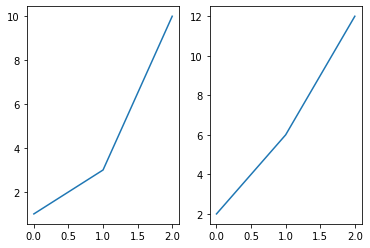

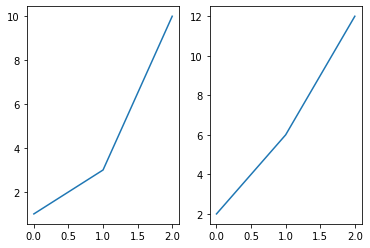

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

# using the pylab interface
plt.subplot(1, 2, 1)
plt.plot([1,3,10]);
plt.subplot(1, 2, 2)
plt.plot([2,6,12]);


#using the object oriented interface
fig, ax = plt.subplots(1, 2)
ax[0].plot([1, 3, 10]);
ax[1].plot([2,6,12]);


## Part 1.4: seaborn

seaborn is a visualization library built off Matplotlib, but it provides a higher level interface that uses pandas DataFrames. One can think of it as being somewhat similar to ggplot. 

There are "axes-level" functions that plot on a single axis and "figure-level" functions that plot across multiple axes. Figure level plots are grouped based on the types of variables being plotted; e.g., a single quantitative variable, two quantitative variables, etc. The image below shows different categories of plots that can be created in seaborn.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width=500 height=500>

Note: to use the seaborn functions below you will have to use seaborn version 0.11 or higher which might require updating your packages in conda. This can be done using: 
- conda activate facwavdev
- conda update seaborn


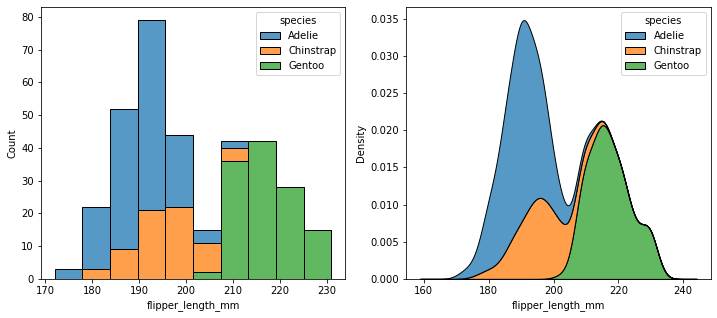

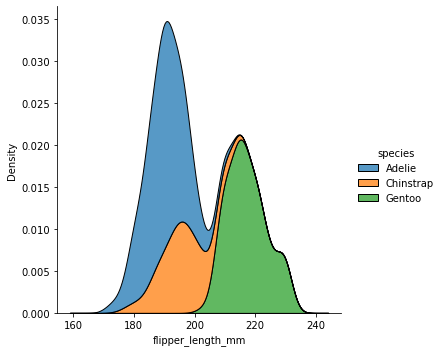

In [4]:
import seaborn as sns
penguins = sns.load_dataset("penguins") 

# axes-level plots

# create two subplots and set the figure size
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots(1, 2)

# create two axes-level plots of a distribution of a single quantitative variable
sns.histplot(data=penguins, ax = ax[0], x="flipper_length_mm", hue="species", multiple="stack");
sns.kdeplot(data=penguins,  ax = ax[1], x="flipper_length_mm", hue="species", multiple="stack");


# create a figure-level plot of a distribution of a single quantitative variable
sns.displot(data=penguins, x="flipper_length_mm", 
            hue="species", multiple="stack", kind="kde");



# Part 2: Revisiting manipulating and visualizing the avocado data

Let's revisit manipulating and visualizing the avocado data but using popular Python Data Science packages. 

Below we reload these packages, although not really necessary if one has loaded them already. It is recommended that all packages are loaded at the top of a Jupyter notebook.


In [5]:
# importing packages that we will use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make sure we can display figures in the Jupyter notebook
%matplotlib inline


### Part 2.1: Loading the avocado data

Let's reload the avocado data as a pandas DataFrame using the `pd.read_csv("csv_or_url")` method. We will also convert the `Date` column to a `datetime` data type. 

**Exercise 2.1**: Please show the first 5 rows of the avocado DataFrame using `df.head(5)` method.


In [6]:
avocado = pd.read_csv("avocado.csv")

# convert the Date column to a "datatime" data type
avocado['Date'] = pd.to_datetime(avocado['Date'])

# Ignore this (this will remove a warning later that arises in later exercises when plotting with dates)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# show the first 5 rows of the avocado DataFrame
avocado.head(5)



Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

### Part 2.2: Relabeling columns

Let's rename the `4046`, `4225` and `4770` columns. The code below does this using a `df.rename()` method which takes a dictionary of elements to describe how the columns should be renamed. A Python dictionary is a data structure that enables you to look up a value based on a key that is supplied. 

If you would like to know more about Python dictionary let me know and we can discuss them!


In [7]:
avocado2 = avocado.copy()

# rename using a dictionary - requires knowledge of a dictionary
avocado2.rename(columns = {"4046": "sold_nonorg_sm", 
                          "4225": "sold_nonorg_l",
                          "4770": "sold_nonorg_xl"}, 
                inplace = True)

avocado2.head(3)


Date  AveragePrice  Total Volume  sold_nonorg_sm  sold_nonorg_l  \
0 2015-12-27          1.33      64236.62         1036.74       54454.85   
1 2015-12-20          1.35      54876.98          674.28       44638.81   
2 2015-12-13          0.93     118220.22          794.70      109149.67   

   sold_nonorg_xl  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0           48.16     8696.87     8603.62       93.25          0.0   
1           58.33     9505.56     9408.07       97.49          0.0   
2          130.50     8145.35     8042.21      103.14          0.0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  2015  Albany  
2  conventional  2015  Albany

### Part 2.3: Reducing (filtering) the data to a smaller number of rows

To filter data using pandas requires creating a "Boolean mask". We do this by creating a Series of Boolean values (True's and False's) that meet particular criteria. Once we have this mask we can use it to select only the columns that are listed as True (this is similar to how one can filter rows of an R data frame in base R). 

**Exercise 2.3**: The code below filters the avocado data to get only the data from the Northeast. Please use the `df.shape` property to see how many rows this DataFrame has. Also play around with the code to explore filtering the data in other ways.


In [8]:

# print the boolean mask
the_mask = avocado2.region == "Northeast"

print(the_mask)

# filter the data based on a boolean mask
avocado3 = avocado2[the_mask]
#avocado3 = avocado2[avocado2.region == "Northeast"]

# print how many rows the 
print(avocado3.shape[0])


0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: region, Length: 18249, dtype: bool
338


### Part 2.4: Selecting a subset of the columns

We can select a subset of columns using the syntax `df[["col1", "col2", "col3"]]`; i.e., we pass a list of columns we would like to select into our data frame `df[]`. 

**Exercise 2.4**: Create a DataFrame `avocado4` that only has only the columns:
- Date
- AveragePrice
- Total Volume
- type

In [9]:

# select with a list
avocado4 = avocado3[["Date", "AveragePrice", "Total Volume", "type"]]

avocado4.head(5)


Date  AveragePrice  Total Volume          type
1508 2015-12-27          1.20    3156360.20  conventional
1509 2015-12-20          1.20    3190120.04  conventional
1510 2015-12-13          1.09    3696551.52  conventional
1511 2015-12-06          1.14    3218494.55  conventional
1512 2015-11-29          1.22    2593780.51  conventional

### Part 2.5: Creating separate tables for conventional and organic avocados (can skip)

To gain more practice with filitering data in pandas, let's create separate DataFrames that have the conventional and organic avocados.

**Exercise 2.5**: Please create a DataFrame called `conventional` that only has data from conventional avocados, and a DataFrame called `organic` that only has data from organic avocados. Then print the number of rows in each DataFrame.


In [10]:
conventional = avocado4[avocado4.type == "conventional"]
organic = avocado4[avocado4.type == "organic"]

print(conventional.shape[0])
print(organic.shape[0])


169
169


### Part 2.6a: Supply and demand visualization using Matplotlib

Let's create a scatter plot of the volume of avocados sold as a function of their price using Matplotlib. To do this we can use the `plt.scatter("x_col", "y_col")` function. 

**Exercise 2.6**: Please go ahead and create the scatter plot. You can also use the `plt.xlabel("label")` and `plt.ylabel("label")` to add better labels to the axes.


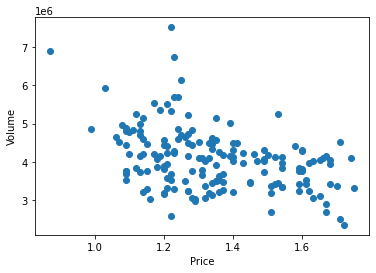

In [11]:
# plotting using Matplotlib pylab interface
plt.scatter(conventional["AveragePrice"], conventional["Total Volume"]);
plt.xlabel("Price");
plt.ylabel("Volume");


### Part 2.6a: Supply and demand visualization using seaborn

Let's also create a scatter plot of the volume of avocados sold as a function of their price using seaborn. To do this we can use the `sns.relplot(data = df, x = "x_col", y = "y_col")`.

**Exercise 2.6**: Please go ahead ans create the scatter plot. Create two versions of this plot that have one additonal argument which is either:
- `col = "type"`  
- `hue = "type"`


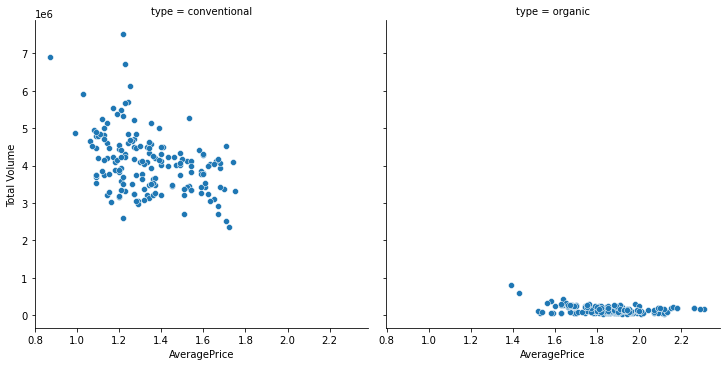

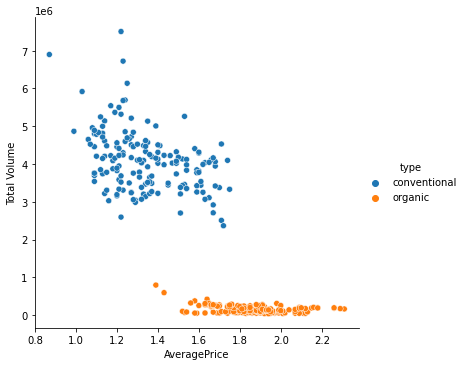

In [12]:

# using seaborn to create a facet plot of both conventional and organic
sns.relplot(data = avocado4, x = "AveragePrice", y = "Total Volume", col = "type");

# using seaborn to create a plot of both conventional and organic distinguished by color
sns.relplot(data = avocado4, x = "AveragePrice", y = "Total Volume", hue = "type");



### Part 2.7: Joining Tables (can skip)

In order to practice joining DataFrames, let's join the information about conventional and organic avocados into a single wide DataFrame. 

To join to DataFrames together we can use the `df1.merge(df2, on = 'Date', suffix = ('_left_suffix, '_right_shuffix')` method. Where:
- `df1` is the first DataFrame we want to join
- `df2` is the second DataFrame we want to join 
- `on` is the name of a column that both tables have in common that we want to join on
- `suffix` is an optional tuple that specifies a string to append to the names of the left and right columns


Note: different types of joins are possible, see `? df.merge` for more details.

**Exercise 2.7**: Please create an variable `wide_data` that has the data from `conventional` DataFrame joined with the `organic` DataFrame. Then print the first 5 rows of this DataFrame. 



In [13]:
wide_data = conventional.merge(organic, on = 'Date', suffixes = ('_conventional', '_organic'))

wide_data.head(5)


Date  AveragePrice_conventional  Total Volume_conventional  \
0 2015-12-27                       1.20                 3156360.20   
1 2015-12-20                       1.20                 3190120.04   
2 2015-12-13                       1.09                 3696551.52   
3 2015-12-06                       1.14                 3218494.55   
4 2015-11-29                       1.22                 2593780.51   

  type_conventional  AveragePrice_organic  Total Volume_organic type_organic  
0      conventional                  1.70              75884.69      organic  
1      conventional                  1.77              73826.41      organic  
2      conventional                  1.80              76466.85      organic  
3      conventional                  1.53              67245.25      organic  
4      conventional                  1.59              48901.36      organic

### Part 2.8: Are organic avocados really more expensive? 

Now we are ready to again address whether organic avocados are really more expensive and by how much! Let's start addressing this question by visualizing the data and overlapping histograms using seaborn.

**Exercise 2.8**: Please use the `sns.displot(data = df, x = "x_col", hue = "hue_col", kind = "plot_type")` method to plot overlapping kernel density estimates of the average avocado price where:

- `df` is the data frame you want to plot the data from
- `"x_col"` is the name of the data column you want to plot
- `"hue_col"` is the name of the column that specifies the type of avocado 
- `"plot_type"` should be set to the string "kde" to plot a kernel density estimate


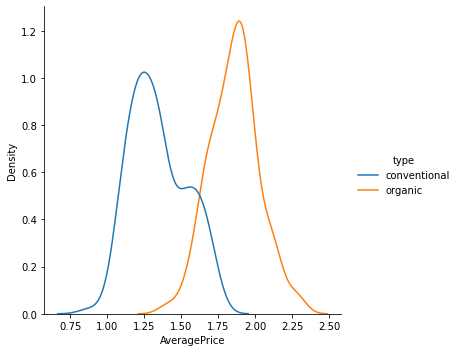

In [14]:

sns.displot(data = avocado4, x="AveragePrice", 
            hue="type", kind="kde");



### Part 2.9: Are organic avocados really more expensive? Additional visualizations!

Let's use seaborn to create some additional visualizations comparing conventional and organic avocados. 

**Exercise 2.9**: The code below uses `sns.catplot()` function to create a stripchart of the data for the conventional and organic avocado prices. Please create versions of the plot that plot the same data but that create different plots by setting the `kind` argument to the following values:

- `"box"` to create a boxplot
- `"swarm"` to create a swarmplot
- `"violin"` to create a violin plot
- `"point"` to create a single connected point at the category means
- `"bar"` to create a dynamite plot

You can also use `? sns.catplot` to see more options. Which type of plot do you think looks best? 


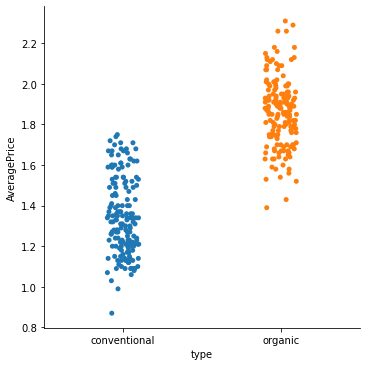

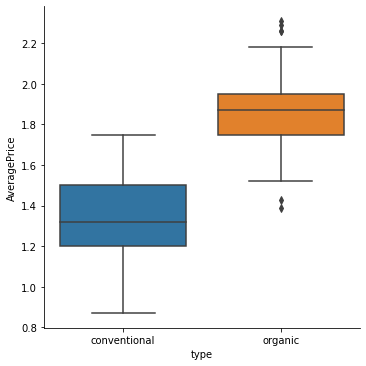

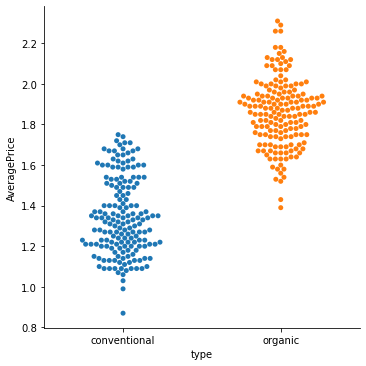

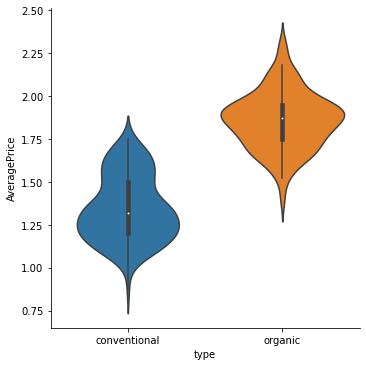

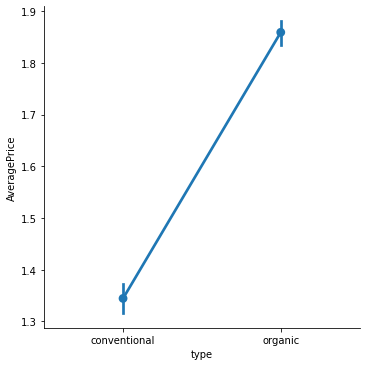

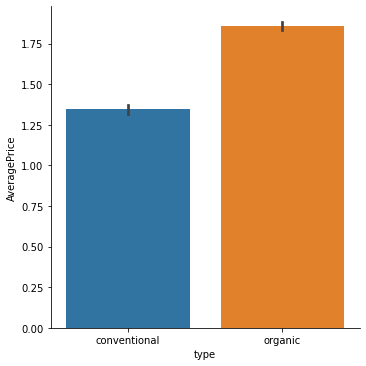

In [15]:

# default kind is stripplot
sns.catplot(data = avocado4, x = "type", y = "AveragePrice", kind = "strip")

# other options
sns.catplot(data = avocado4, x = "type", y = "AveragePrice", kind = "box");
sns.catplot(data = avocado4, x = "type", y = "AveragePrice", kind = "swarm");
sns.catplot(data = avocado4, x = "type", y = "AveragePrice", kind = "violin");
sns.catplot(data = avocado4, x = "type", y = "AveragePrice", kind = "point");
sns.catplot(data = avocado4, x = "type", y = "AveragePrice", kind = "bar");

# which is best? 


### Part 2.10: Getting the difference in conventional and organic prices for each date (can skip)

Another way we can assess whether organic avocados are more expensive than conventional avocados is to compare their prices on each date. 

To examine this in pandas, we can pull a Series out of our DataFrame using the syntax: `my_series = df["colum_name"]`. If we have two Series with the same index values in `my_series1` and `my_series2`, then we can create an Series that has the differences between each index value using  `diff_series = my_series1 - my_series2`.


**Exercise 2.10**: Please complete the following steps to create a Series called `price_difference` that has the difference in prices of organic and conventional avocados for each date:

1. Extract a Series from the `wide_data` DataFrame that has the prices of organic avocados and store it in a variable called `organic_array`. 
2. Extract a Series from the `wide_data` DataFrame that has the prices of conventional avocados and store it in a variable called `conventional_array`. 
3. Create a variable called `price_difference` that is a Series that has the difference in prices between the organic and conventional avocados.
4. Use the `min()` and `max()` functions to find what the minimum and maximum price differences are. Does this provide evidence that organic avocados are always more expensive? 


In [16]:

# these are Series - could use the to_numpy() method to convert them to NumPy arrays but not needed
organic_array = wide_data['AveragePrice_organic']
conventional_array = wide_data['AveragePrice_conventional'] 

# can subtract two Series that have the same Indexes 
price_differences = organic_array - conventional_array


print(min(price_differences))
print(max(price_differences))



0.010000000000000009
0.9900000000000002


### Part 2.11: Adding a column that has the difference in organic and conventional prices our wide DataFrame (can skip)

Now that we have a Series of price differences, we can add these price differences back as a column to our wide data table. To add an Series to a DataFrame, we can use `df["new_col_name"] = series_to_add`; note: the `series_to_add` needs to have the same number of elements as the number of rows in `df`.

**Exercise 2.11**: Please add a new column called `Price difference` to the `wide_data` DataFrame which has the difference in organic and conventional avocado prices. Once you have added this column, using the `df.head(5)` to see the first 5 rows of the DataFrame.



In [17]:
wide_data["Price difference"] = price_differences

wide_data.head(5)


Date  AveragePrice_conventional  Total Volume_conventional  \
0 2015-12-27                       1.20                 3156360.20   
1 2015-12-20                       1.20                 3190120.04   
2 2015-12-13                       1.09                 3696551.52   
3 2015-12-06                       1.14                 3218494.55   
4 2015-11-29                       1.22                 2593780.51   

  type_conventional  AveragePrice_organic  Total Volume_organic type_organic  \
0      conventional                  1.70              75884.69      organic   
1      conventional                  1.77              73826.41      organic   
2      conventional                  1.80              76466.85      organic   
3      conventional                  1.53              67245.25      organic   
4      conventional                  1.59              48901.36      organic   

   Price difference  
0              0.50  
1              0.57  
2              0.71  
3              0.39  
4              0.37

### Part 2.12: Calculating summary statistics (can skip)

We can calculate summary statistics, such as the mean and standard deviation, on values in a DataFrame using `df.mean()` and `df.std()`. 

**Exercise 2.12**: Using the `wide_data` DataFrame, calculate the mean and standard deviation of the conventional prices and organic prices. 


In [20]:

print(wide_data.mean())
print(wide_data.std())


# maybe too complex, just print these separately
mean_sd = pd.concat([wide_data.mean().to_frame().T, wide_data.std().to_frame().T])

mean_sd.index = ["mean", "sd"]

mean_sd



AveragePrice_conventional    1.344438e+00
Total Volume_conventional    4.077247e+06
AveragePrice_organic         1.859408e+00
Total Volume_organic         1.433497e+05
Price difference             5.149704e-01
dtype: float64
Date                         342 days 12:16:38.523299392
AveragePrice_conventional                        0.18956
Total Volume_conventional                  807016.253448
AveragePrice_organic                            0.166871
Total Volume_organic                       103535.334452
Price difference                                0.209086
dtype: object


/conda/envs/wavfacdev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/conda/envs/wavfacdev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


AveragePrice_conventional Total Volume_conventional AveragePrice_organic  \
mean                  1.344438            4077247.416982             1.859408   
sd                     0.18956             807016.253448             0.166871   

     Total Volume_organic Price difference                        Date  
mean        143349.681006          0.51497                         NaT  
sd          103535.334452         0.209086 342 days 12:16:38.523299392

### Part 2.13: Calculating summary statistics II

We can also calculate summary statistics on a DataFrame using `df.groupby("grouping_column").agg_method()` method. Let's try that approach here as well.

**Exercise 2.13**: Use the `avocado4` table to calculate the mean conventional and organic avocado prices. Hint, to calculate the mean of the values in a DataFrame use `df.mean()`. 


In [19]:
avocado4.groupby("type").mean()


AveragePrice  Total Volume
type                                    
conventional      1.344438  4.077247e+06
organic           1.859408  1.433497e+05

### Part 2.14: Explore on your own! 

Try exploring the data further to see if you can find anything else interesting in it! 



<img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/funny-avocado-lover-gifts-mike-g.jpg" width=500 height=500>